In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

In [2]:
# Importing dataset
df=pd.read_csv("C:/Users/sofia/Downloads/Advertising.csv")
df.drop('Unnamed: 0',inplace=True,axis=1)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

##### There are no null values in the data

<AxesSubplot:>

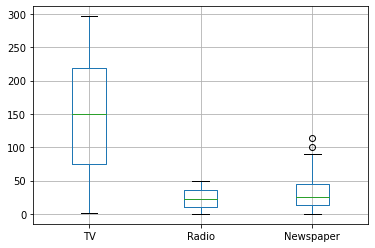

In [5]:
df[['TV','Radio','Newspaper']].boxplot()

##### Amount invested on advertisement through TV is high compared to the other two medium.

Text(0.5, 1.0, 'Amount spent on advertisement through Newspaper and corresponding sales')

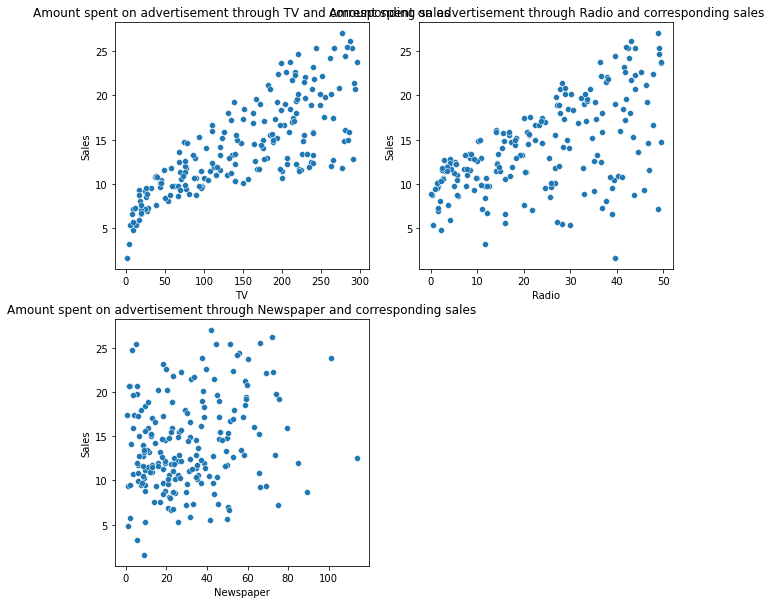

In [6]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.scatterplot(x='TV',y='Sales',data=df)
plt.title('Amount spent on advertisement through TV and corresponding sales')

plt.subplot(2,2,2)
sns.scatterplot(x='Radio',y='Sales',data=df)
plt.title('Amount spent on advertisement through Radio and corresponding sales')

plt.subplot(2,2,3)
sns.scatterplot(x='Newspaper',y='Sales',data=df)
plt.title('Amount spent on advertisement through Newspaper and corresponding sales')


##### Amount invested in advertisement through newspaper doesnot influence the sales much when compared to the other two medium of advertisement. Advertising through TV shows the highest effect in sales.

<AxesSubplot:xlabel='TV', ylabel='Radio'>

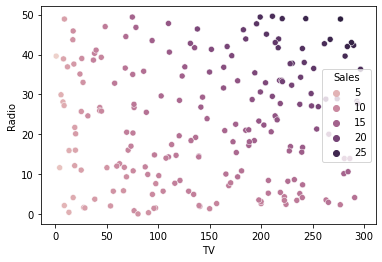

In [7]:
sns.scatterplot(x=df['TV'],y=df['Radio'],hue=df['Sales'])

This plot gives the range in which sales value lies for given amount of investment in advertising through TV and radio

### Summary of given data

In [8]:
summary=df.describe()
summary.rename(index={'count':'No. of observations','mean':'Average','std':'Standard deviation','min':'Minimum value','25%':'25th percentile','50%':'Median','75%':'75th percentile','max':'Maximum value'})

,TV,Radio,Newspaper,Sales
No. of observations,200.000000,200.000000,200.000000,200.000000
Average,147.042500,23.264000,30.554000,14.022500
Standard deviation,85.854236,14.846809,21.778621,5.217457
Minimum value,0.700000,0.000000,0.300000,1.600000
25th percentile,74.375000,9.975000,12.750000,10.375000
Median,149.750000,22.900000,25.750000,12.900000
75th percentile,218.825000,36.525000,45.100000,17.400000
Maximum value,296.400000,49.600000,114.000000,27.000000


### To find out whether the same amount was spent for the three advertisements (TV , Radio and Newspaper).

To check whether same amount was spent on the three kinds of advertisement, we test whether the means of data on amount spent on different advertisements are equal and this is done using F test.

Here the hypotheses are

H0 : Amount spent on advertising on all three advertisements are same. 

H1 : Different amount is spent on the three kinds of advertisements.

In [9]:
statistic,p_val=f_oneway(df['TV'],df['Radio'],df['Newspaper'])
print('F score=',statistic,'\np value=',p_val,'\n')

alpha  = 0.05       # Significance level
if p_val>=alpha:
    print("We fail to reject H0 based on the sample.\nWe can conclude that the same amount was spent on all three advertisements.")
else:
    print("There is enough evidence to reject H0 based on the sample.\nAmount spent on the three kinds of advertisements are significantly different.")

F score= 358.8514595342597 
p value= 4.552931539744962e-103 

There is enough evidence to reject H0 based on the sample.
Amount spent on the three kinds of advertisements are significantly different.
